In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from scipy.stats import skew

from sklearn.model_selection import cross_validate, cross_val_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (6,4)
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:.1f}'.format
np.set_printoptions(precision=None, suppress=True)

In [2]:
df = pd.read_csv("autoscout24-germany-dataset.csv")
df

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


In [3]:
df.hp.max()

850.0

In [4]:
columns =list(df.columns)
columns.remove("price")
columns.append("price")
columns
df = df[columns]
df.head()

,mileage,make,model,fuel,gear,offerType,hp,year,price
0,235000,BMW,316,Diesel,Manual,Used,116.0,2011,6800
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,122.0,2011,6877
2,149300,SEAT,Exeo,Gasoline,Manual,Used,160.0,2011,6900
3,96200,Renault,Megane,Gasoline,Manual,Used,110.0,2011,6950
4,156000,Peugeot,308,Gasoline,Manual,Used,156.0,2011,6950


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   hp         46376 non-null  float64
 7   year       46405 non-null  int64  
 8   price      46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [6]:
df.isnull().sum()

mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
hp            29
year           0
price          0
dtype: int64

In [7]:
df.dropna(inplace = True)
df.isnull().sum()

mileage      0
make         0
model        0
fuel         0
gear         0
offerType    0
hp           0
year         0
price        0
dtype: int64

In [8]:
df["year"] = 2023 - df.year

In [9]:
df.head()

,mileage,make,model,fuel,gear,offerType,hp,year,price
0,235000,BMW,316,Diesel,Manual,Used,116.0,12,6800
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,122.0,12,6877
2,149300,SEAT,Exeo,Gasoline,Manual,Used,160.0,12,6900
3,96200,Renault,Megane,Gasoline,Manual,Used,110.0,12,6950
4,156000,Peugeot,308,Gasoline,Manual,Used,156.0,12,6950


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mileage,46071.0,71233.1,62454.1,0.0,19900.0,60000.0,105000.0,1111111.0
hp,46071.0,133.0,75.1,1.0,86.0,116.0,150.0,850.0
year,46071.0,7.0,3.2,2.0,4.0,7.0,10.0,12.0
price,46071.0,16563.1,19279.6,1100.0,7490.0,11000.0,19490.0,1199900.0


In [11]:
df.describe(include=["bool","object"]).T

,count,unique,top,freq
make,46071,71,Volkswagen,6907
model,46071,835,Golf,1489
fuel,46071,11,Gasoline,28720
gear,46071,3,Manual,30309
offerType,46071,5,Used,39822


In [12]:
df.model.value_counts()

Golf                         1489
Corsa                        1485
Fiesta                       1273
Astra                        1190
Focus                         985
                             ... 
John Cooper Works Clubman       1
323                             1
Rodius                          1
Journey                         1
NV250                           1
Name: model, Length: 835, dtype: int64

In [13]:
df.make.value_counts()

Volkswagen       6907
Opel             4789
Ford             4410
Skoda            2874
Renault          2792
Audi             2681
BMW              2392
Mercedes-Benz    2341
SEAT             1922
Hyundai          1880
Fiat             1692
Toyota           1272
Peugeot          1226
Kia              1040
smart             955
Citroen           952
Volvo             803
Nissan            744
Mazda             713
Dacia             711
MINI              465
Mitsubishi        401
Suzuki            358
Porsche           243
Chevrolet         223
Honda             182
Land              164
Jeep              158
Alfa              130
Jaguar            126
Cupra              65
Subaru             57
Abarth             43
Lexus              43
SsangYong          37
Lada               31
Aston              30
Dodge              22
Lancia             17
DS                 16
Tesla              13
Bentley            12
Infiniti           12
Maserati           12
Microcar           11
Ferrari   

In [14]:
df.shape

(46071, 9)

In [15]:
liste = df.make.value_counts()[49:71]

In [16]:
liste.keys()

Index(['Lamborghini', 'Cadillac', 'Ligier', 'Chrysler', 'Polestar', 'Corvette',
       'Rolls-Royce', 'Piaggio', 'Iveco', 'Aixam', 'Morgan', 'Maybach', 'RAM',
       'Estrima', 'DFSK', 'Baic', 'FISKER', 'Isuzu', 'Others', 'Zhidou',
       'Brilliance', 'Alpine'],
      dtype='object')

In [17]:
for i in list(liste.keys()):
    df.drop(index = df.loc[df.make == i].index, inplace = True)

In [18]:
df.shape

(46009, 9)

In [19]:
df.make.unique()

array(['BMW', 'Volkswagen', 'SEAT', 'Renault', 'Peugeot', 'Toyota',
       'Opel', 'Mazda', 'Ford', 'Mercedes-Benz', 'Chevrolet', 'Audi',
       'Fiat', 'Kia', 'Dacia', 'MINI', 'Hyundai', 'Skoda', 'Citroen',
       'Infiniti', 'Suzuki', 'SsangYong', 'smart', 'Cupra', 'Volvo',
       'Jaguar', 'Porsche', 'Nissan', 'Honda', 'Mitsubishi', 'Lexus',
       'Jeep', 'Maserati', 'Bentley', 'Land', 'Alfa', 'Subaru', 'Dodge',
       'Microcar', 'Lada', 'Tesla', 'McLaren', 'Aston', 'Lancia',
       'Abarth', 'DS', 'Daihatsu', 'Ferrari', 'Alpina'], dtype=object)

In [20]:
liste1 = df.model.value_counts()[424:800]

In [21]:
liste1.keys()

Index(['Boxster', '230', '440', 'Expert', 'Cooper SD Countryman', 'SLK 200',
       'S 400', 'Enyaq', 'G 350', 'AMG GT',
       ...
       'Alaskan', 'Mirai', 'SL 350', 'SL 500', 'Bayon', 'Romeo 4C', 'Linea',
       'Journey', '370Z', 'NV250'],
      dtype='object', length=376)

In [22]:
for i in list(liste1.keys()):
    df.drop(index = df.loc[df.model == i].index, inplace = True)

In [23]:
df.shape

(44696, 9)

In [24]:
df.corr()

,mileage,hp,year,price
mileage,1.0,0.0,0.7,-0.4
hp,0.0,1.0,-0.2,0.8
year,0.7,-0.2,1.0,-0.5
price,-0.4,0.8,-0.5,1.0


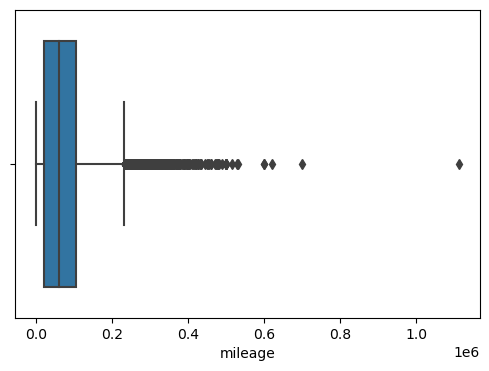

In [25]:
sns.boxplot(df.mileage);

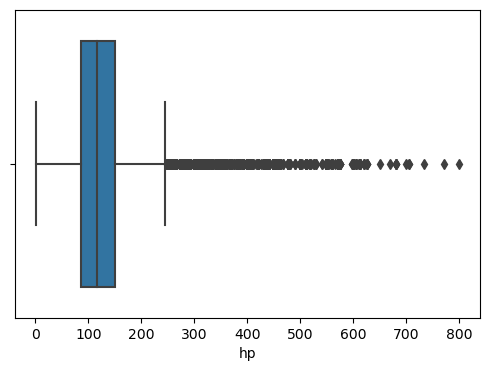

In [26]:
sns.boxplot(df.hp);

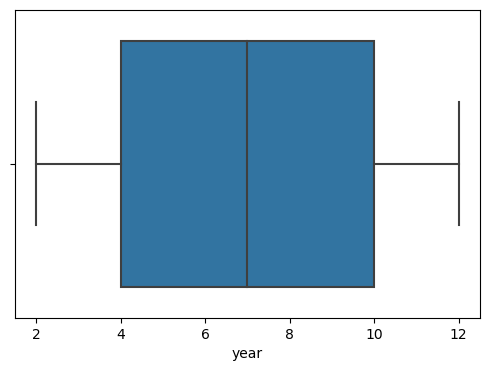

In [27]:
sns.boxplot(df.year);

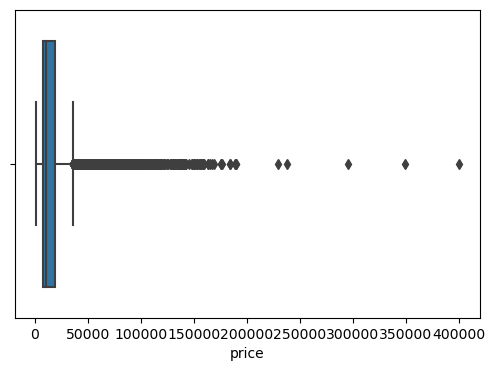

In [28]:
sns.boxplot(df.price);

In [29]:
df.price.max()

399911

In [30]:
df.price.min()

1100

In [31]:
#upper = np.quantile(df.price, 0.99)

In [32]:
#lower = np.quantile(df.price, 0.01)

In [33]:
#df = df[(df.price < upper)&(df.price > lower)]

In [34]:
#df.shape

In [35]:
q3 = np.quantile(df.price, 0.75)

In [36]:
q1= np.quantile(df.price, 0.25)

In [37]:
iqr = q3-q1

In [38]:
df = df[(df.price < q3+iqr*1.5)&(df.price > q1-iqr*1.5)]

In [39]:
#upper = np.quantile(df.mileage, 0.99)

In [40]:
#lower = np.quantile(df.mileage, 0.09)

In [41]:
#df = df[(df.mileage < upper)&(df.mileage> lower)]

In [42]:
q3 = np.quantile(df.mileage, 0.75)

In [43]:
q1= np.quantile(df.mileage, 0.25)

In [44]:
iqr = q3-q1

In [45]:
df = df[(df.mileage < q3+iqr*1.5)&(df.mileage > q1-iqr*1.5)]

In [46]:
#upper = np.quantile(df.hp, 0.99)

In [47]:
#lower = np.quantile(df.hp, 0.09)

In [48]:
#df = df[(df.hp < upper)&(df.hp > lower)]

In [49]:
#df.shape

In [50]:
q3 = np.quantile(df.hp, 0.75)

In [51]:
q1= np.quantile(df.hp, 0.25)

In [52]:
iqr = q3-q1

In [53]:
df = df[(df.hp < q3+iqr*1.5)&(df.hp > q1-iqr*1.5)]

In [54]:
df.shape

(39929, 9)

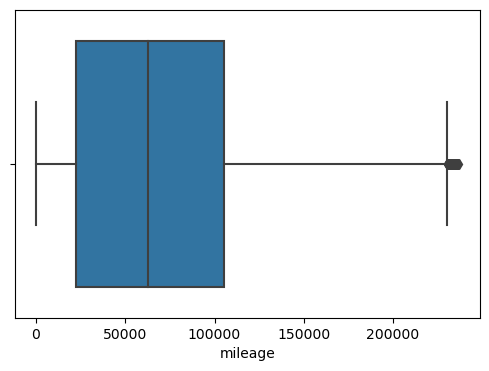

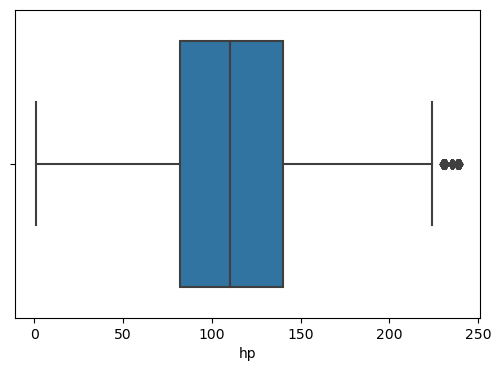

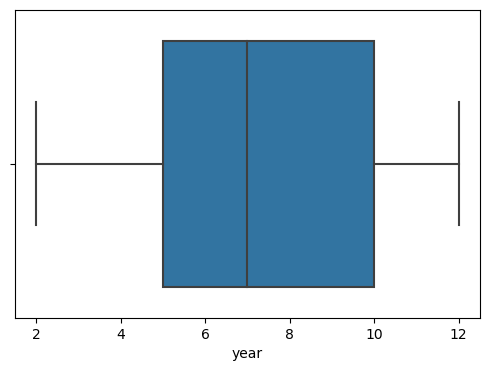

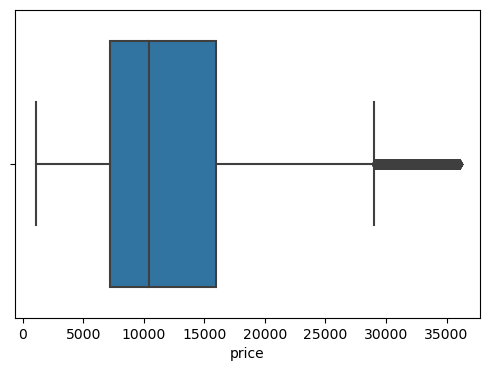

In [55]:
for column in ["mileage","hp","year","price"]:
    sns.boxplot(df[column])
    plt.show()

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mileage,39929.0,70286.4,55266.3,0.0,22544.0,62797.0,105555.0,236790.0
hp,39929.0,113.8,38.8,1.0,82.0,110.0,140.0,239.0
year,39929.0,7.2,3.1,2.0,5.0,7.0,10.0,12.0
price,39929.0,12594.6,7298.2,1100.0,7220.0,10415.0,15950.0,35999.0


In [57]:
df.fuel.unique()

array(['Diesel', 'Gasoline', 'Electric/Gasoline', '-/- (Fuel)',
       'Electric', 'LPG', 'CNG', 'Others', 'Electric/Diesel', 'Ethanol'],
      dtype=object)

In [58]:
df["fuel"] = df["fuel"].replace(['Electric/Diesel','Electric/Gasoline'],'Electric')
df["fuel"] = df["fuel"].replace(['-/- (Fuel)','CNG','LPG','Others', 'Hydrogen', 'Ethanol'],"Gas")
df["fuel"].unique()

array(['Diesel', 'Gasoline', 'Electric', 'Gas'], dtype=object)

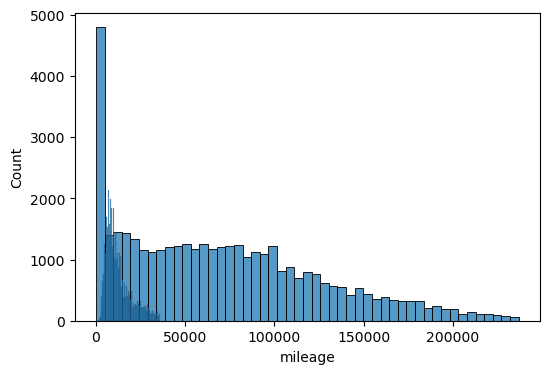

In [59]:
for column in [column for column in df.columns if df[column].dtype!= 'object']:
    sns.histplot(df[column])

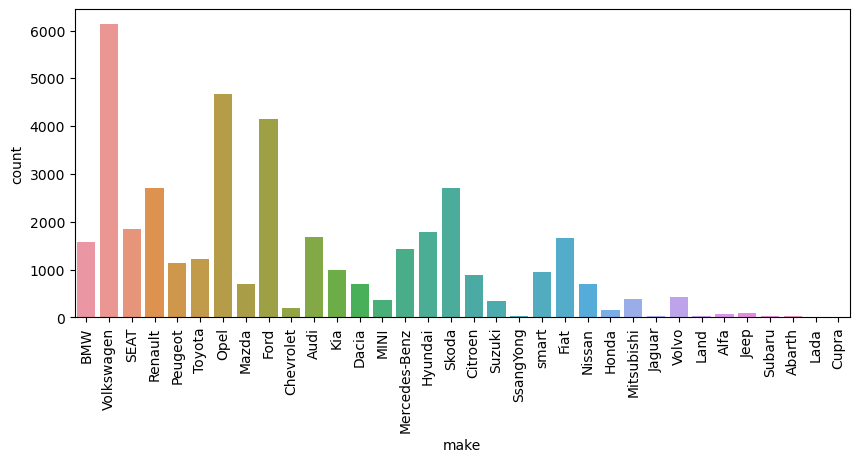

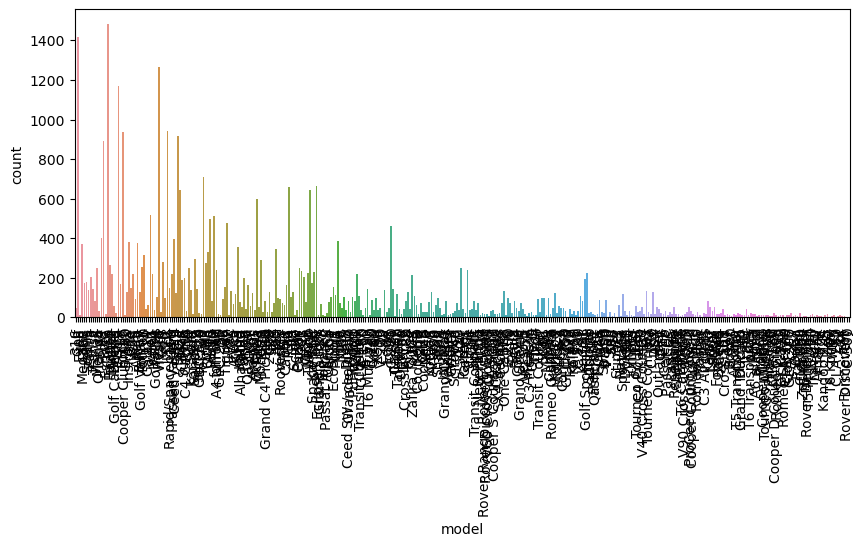

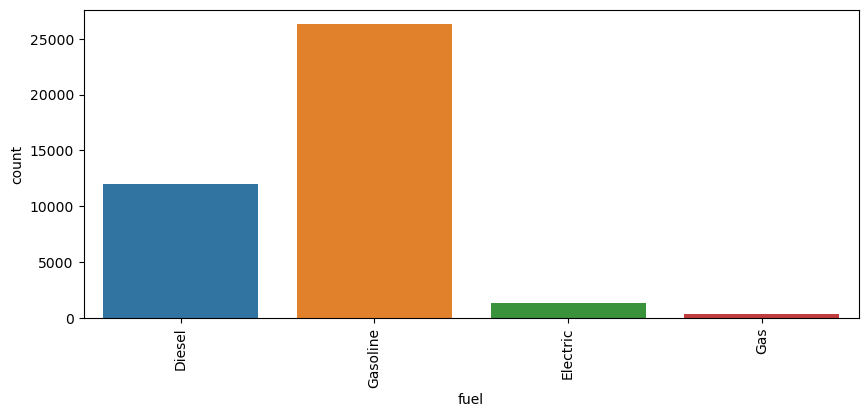

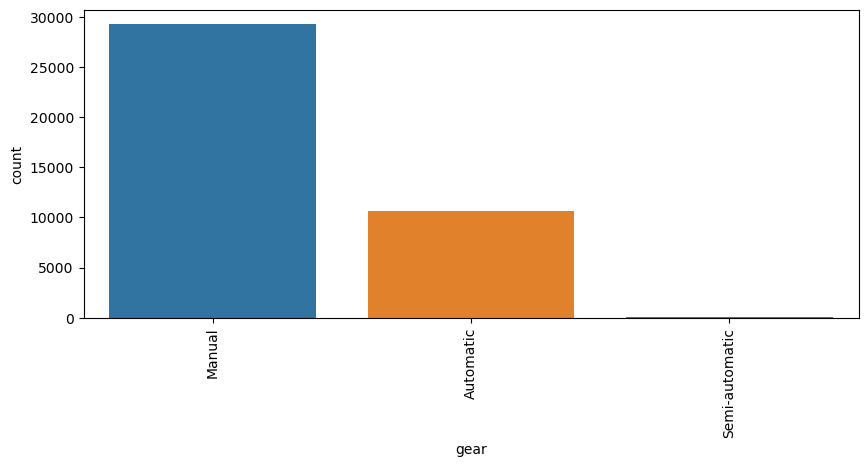

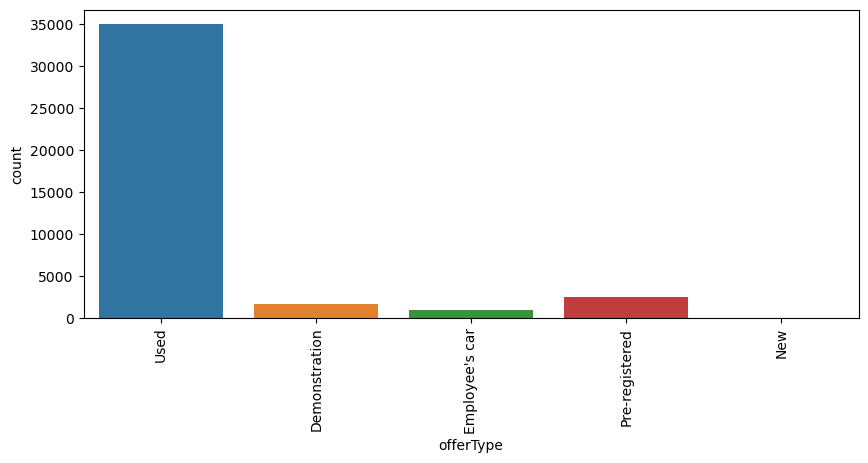

In [60]:
for column in [column for column in df.columns if df[column].dtype== 'object']:
    plt.figure(figsize=(10,4))
    sns.countplot(df[column])
    plt.xticks(rotation='vertical')

In [61]:
df.corr()

,mileage,hp,year,price
mileage,1.0,0.2,0.7,-0.5
hp,0.2,1.0,-0.1,0.6
year,0.7,-0.1,1.0,-0.7
price,-0.5,0.6,-0.7,1.0


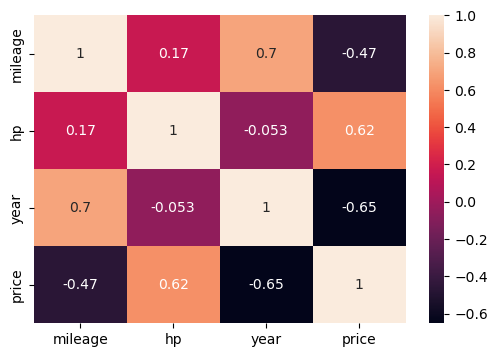

In [62]:
sns.heatmap(df.corr(), annot = True);

In [63]:
df.make.value_counts()

Volkswagen       6136
Opel             4671
Ford             4158
Skoda            2713
Renault          2707
SEAT             1845
Hyundai          1789
Audi             1689
Fiat             1655
BMW              1587
Mercedes-Benz    1429
Toyota           1219
Peugeot          1146
Kia               998
smart             951
Citroen           898
Nissan            708
Dacia             707
Mazda             696
Volvo             428
Mitsubishi        376
MINI              361
Suzuki            340
Chevrolet         203
Honda             158
Jeep               99
Alfa               80
Land               38
Subaru             34
Jaguar             34
SsangYong          27
Abarth             24
Lada               16
Cupra               9
Name: make, dtype: int64

In [64]:
df.model.value_counts()

Corsa                       1482
Golf                        1417
Fiesta                      1266
Astra                       1170
up!                          942
Focus                        936
Fabia                        915
Polo                         891
forTwo                       709
500                          663
Clio                         657
Twingo                       643
Ibiza                        642
Octavia                      601
Leon                         519
i10                          515
Aygo                         498
Tiguan                       476
A3                           462
A4                           401
Passat Variant               397
i30                          386
Insignia                     381
Adam                         374
Megane                       369
Kuga                         355
i20                          346
Citigo                       333
Touran                       318
Sandero                      296
Mondeo    

In [65]:
df.model.value_counts()[285:]

GLK 220                14
Golf GTI               14
Master                 14
Qubo                   14
T5 Multivan            14
Veloster               13
Eclipse Cross          13
Fiorino                13
Proace                 13
Exeo                   13
Grand Tourneo          13
One D                  13
MX-30                  13
Twizy                  13
Fox                    13
Modus                  13
GLC 250                12
Qashqai+2              12
T6 Caravelle           12
Kangoo Z.E.            12
CLA 220                12
S60                    12
iQ                     12
V70                    12
Cooper D Countryman    11
595                    11
One Cabrio             11
125                    11
XF                     11
C5 Aircross            11
Arkana                 11
Tivoli                 11
Crossland              11
T6 Multivan            11
GLA 180                11
Cooper Clubman         11
New Panda              11
Eos                    10
Cooper Cabri

In [66]:
liste = df.model.value_counts()[285:]
liste.keys()

Index(['GLK 220', 'Golf GTI', 'Master', 'Qubo', 'T5 Multivan', 'Veloster',
       'Eclipse Cross', 'Fiorino', 'Proace', 'Exeo', 'Grand Tourneo', 'One D',
       'MX-30', 'Twizy', 'Fox', 'Modus', 'GLC 250', 'Qashqai+2',
       'T6 Caravelle', 'Kangoo Z.E.', 'CLA 220', 'S60', 'iQ', 'V70',
       'Cooper D Countryman', '595', 'One Cabrio', '125', 'XF', 'C5 Aircross',
       'Arkana', 'Tivoli', 'Crossland', 'T6 Multivan', 'GLA 180',
       'Cooper Clubman', 'New Panda', 'Eos', 'Cooper Cabrio', 'ID.3',
       'Passat CC', 'Boxer', 'XE', 'T6 Kombi', 'S90', 'T5 Kombi', 'E 300',
       'F-Pace', 'Camry', 'Ranger', 'Formentor', 'Jumper', 'Amarok', 'Phaeton',
       'CX-7', 'Zafira Life', 'Navara', 'Touareg', 'V50', 'E-Pace', 'CLA 250',
       'X4', 'A6 allroad', 'Traveller', 'Romeo Giulia', 'V60 Cross Country',
       'V 220', '530', 'V 250', 'X5', 'Stinger', 'Z4', 'Romeo Stelvio',
       'Rover Discovery', 'Rover Defender', 'CLS 350', 'Q7', 'GLC 350',
       'C 300'],
      dtype='object')

In [67]:
for i in list(liste.keys()):
    df.drop(index = df.loc[df.model == i].index, inplace = True)

In [68]:
df.shape

(39234, 9)

In [69]:
df.model.value_counts()

Corsa                       1482
Golf                        1417
Fiesta                      1266
Astra                       1170
up!                          942
Focus                        936
Fabia                        915
Polo                         891
forTwo                       709
500                          663
Clio                         657
Twingo                       643
Ibiza                        642
Octavia                      601
Leon                         519
i10                          515
Aygo                         498
Tiguan                       476
A3                           462
A4                           401
Passat Variant               397
i30                          386
Insignia                     381
Adam                         374
Megane                       369
Kuga                         355
i20                          346
Citigo                       333
Touran                       318
Sandero                      296
Mondeo    

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39234 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    39234 non-null  int64  
 1   make       39234 non-null  object 
 2   model      39234 non-null  object 
 3   fuel       39234 non-null  object 
 4   gear       39234 non-null  object 
 5   offerType  39234 non-null  object 
 6   hp         39234 non-null  float64
 7   year       39234 non-null  int64  
 8   price      39234 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.0+ MB


In [71]:
df1 = df.copy()

In [72]:
df.drop(columns = ["make"], inplace = True)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39234 entries, 0 to 46404
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    39234 non-null  int64  
 1   model      39234 non-null  object 
 2   fuel       39234 non-null  object 
 3   gear       39234 non-null  object 
 4   offerType  39234 non-null  object 
 5   hp         39234 non-null  float64
 6   year       39234 non-null  int64  
 7   price      39234 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 2.7+ MB


In [74]:
df = pd.get_dummies(df,prefix=["fuel","gear","offerType","model"],drop_first=True)
df.head()

,mileage,hp,year,price,fuel_108,fuel_114,fuel_116,fuel_118,fuel_120,fuel_2,fuel_2008,fuel_206,fuel_207,fuel_208,fuel_216,fuel_218,fuel_220,fuel_3,fuel_3008,fuel_308,fuel_316,fuel_318,fuel_320,fuel_325,fuel_420,fuel_5,fuel_500,fuel_5008,fuel_500C,fuel_500L,fuel_500X,fuel_508,fuel_520,fuel_525,fuel_6,fuel_A 160,fuel_A 180,fuel_A 200,fuel_A 250,fuel_A1,fuel_A3,fuel_A4,fuel_A4 allroad,fuel_A5,fuel_A6,fuel_ASX,fuel_Adam,fuel_Agila,fuel_Alhambra,fuel_Altea,fuel_Altea XL,fuel_Alto,fuel_Antara,fuel_Arona,fuel_Arteon,fuel_Astra,fuel_Ateca,fuel_Auris,fuel_Avensis,fuel_Aveo,fuel_Aygo,fuel_B 180,fuel_B 200,fuel_B 220,fuel_B-Max,fuel_Baleno,fuel_Beetle,fuel_Berlingo,fuel_C 180,fuel_C 200,fuel_C 220,fuel_C 250,fuel_C-HR,fuel_C-Max,fuel_C1,fuel_C3,fuel_C3 Aircross,fuel_C3 Picasso,fuel_C4,fuel_C4 Cactus,fuel_C4 Picasso,fuel_C5,fuel_CC,fuel_CLA 180,fuel_CLA 200,fuel_CR-V,fuel_CX-3,fuel_CX-30,fuel_CX-5,fuel_Caddy,fuel_Captiva,fuel_Captur,fuel_Carens,fuel_Cascada,fuel_Ceed / cee'd,fuel_Ceed SW / cee'd SW,fuel_Celerio,fuel_Citan,fuel_Citigo,fuel_Civic,fuel_Clio,fuel_Colt,fuel_Combo,fuel_Compass,fuel_Cooper,fuel_Cooper Countryman,fuel_Cooper D,fuel_Cooper S,fuel_Cooper S Countryman,fuel_Corolla,fuel_Corsa,fuel_Crafter,fuel_Crossland X,fuel_Cruze,fuel_DS3,fuel_DS4,fuel_Doblo,fuel_Dokker,fuel_Ducato,fuel_Duster,fuel_E 200,fuel_E 220,fuel_E 250,fuel_EcoSport,fuel_Edge,fuel_Espace,fuel_Fabia,fuel_Fiesta,fuel_Focus,fuel_Forester,fuel_Freemont,fuel_GLA 200,fuel_GLC 220,fuel_Galaxy,fuel_Golf,fuel_Golf Cabriolet,fuel_Golf Plus,fuel_Golf Sportsvan,fuel_Golf Variant,fuel_Grand C-Max,fuel_Grand C4 Picasso,fuel_Grand Scenic,fuel_Grande Punto,fuel_Grandland X,fuel_Ibiza,fuel_Ignis,fuel_Insignia,fuel_Ioniq,fuel_Jazz,fuel_Jetta,fuel_Juke,fuel_Jumpy,fuel_Ka/Ka+,fuel_Kadjar,fuel_Kamiq,fuel_Kangoo,fuel_Karl,fuel_Karoq,fuel_Kodiaq,fuel_Koleos,fuel_Kona,fuel_Korando,fuel_Kuga,fuel_Laguna,fuel_Leaf,fuel_Leon,fuel_Lodgy,fuel_Logan,fuel_MX-5,fuel_Megane,fuel_Meriva,fuel_Micra,fuel_Mii,fuel_Mokka,fuel_Mokka X,fuel_Mondeo,fuel_NV200,fuel_Niro,fuel_Niva,fuel_Note,fuel_Octavia,fuel_One,fuel_Optima,fuel_Orlando,fuel_Outlander,fuel_Panda,fuel_Partner,fuel_Passat,fuel_Passat Alltrack,fuel_Passat Variant,fuel_Picanto,fuel_Pixo,fuel_Polo,fuel_Prius,fuel_ProCeed / pro_cee'd,fuel_Pulsar,fuel_Puma,fuel_Punto,fuel_Punto Evo,fuel_Q2,fuel_Q3,fuel_Q5,fuel_Qashqai,fuel_RAV 4,fuel_Rapid/Spaceback,fuel_Renegade,fuel_Rio,fuel_Romeo Giulietta,fuel_Romeo MiTo,fuel_Roomster,fuel_Rover Discovery Sport,fuel_Rover Range Rover Evoque,fuel_S-Max,fuel_SX4,fuel_SX4 S-Cross,fuel_Sandero,fuel_Santa Fe,fuel_Scala,fuel_Scenic,fuel_Scirocco,fuel_Scudo,fuel_Sharan,fuel_Sorento,fuel_Soul,fuel_Space Star,fuel_Spark,fuel_Splash,fuel_Sportage,fuel_Sprinter,fuel_Stonic,fuel_Superb,fuel_Swift,fuel_T-Cross,fuel_T-Roc,fuel_T5 Transporter,fuel_T6 Transporter,fuel_TT,fuel_Talisman,fuel_Tarraco,fuel_Tiguan,fuel_Tipo,fuel_Toledo,fuel_Touran,fuel_Tourneo Connect,fuel_Tourneo Courier,fuel_Tourneo Custom,fuel_Trafic,fuel_Transit,fuel_Transit Connect,fuel_Transit Courier,fuel_Transit Custom,fuel_Tucson,fuel_Twingo,fuel_V40,fuel_V40 Cross Country,fuel_V60,fuel_V90,fuel_V90 Cross Country,fuel_Venga,fuel_Verso,fuel_Verso-S,fuel_Vitara,fuel_Vito,fuel_Vivaro,fuel_X-Trail,fuel_X1,fuel_X2,fuel_X3,fuel_XC40,fuel_XC60,fuel_XC90,fuel_XCeed,fuel_XV,fuel_Yaris,fuel_Yeti,fuel_ZOE,fuel_Zafira,fuel_Zafira Tourer,fuel_forFour,fuel_forTwo,fuel_i10,fuel_i20,fuel_i3,fuel_i30,fuel_i40,fuel_iX20,fuel_iX35,fuel_up!,gear_Electric,gear_Gas,gear_Gasoline,offerType_Manual,offerType_Semi-automatic,model_Employee's car,model_New,model_Pre-registered,model_Used
0,235000,116.0,12,6800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [75]:
df.shape

(39234, 297)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39234 entries, 0 to 46404
Columns: 297 entries, mileage to model_Used
dtypes: float64(1), int64(3), uint8(293)
memory usage: 12.5 MB


In [77]:
corr_by_price = df.corr()["price"].sort_values()[:-1]

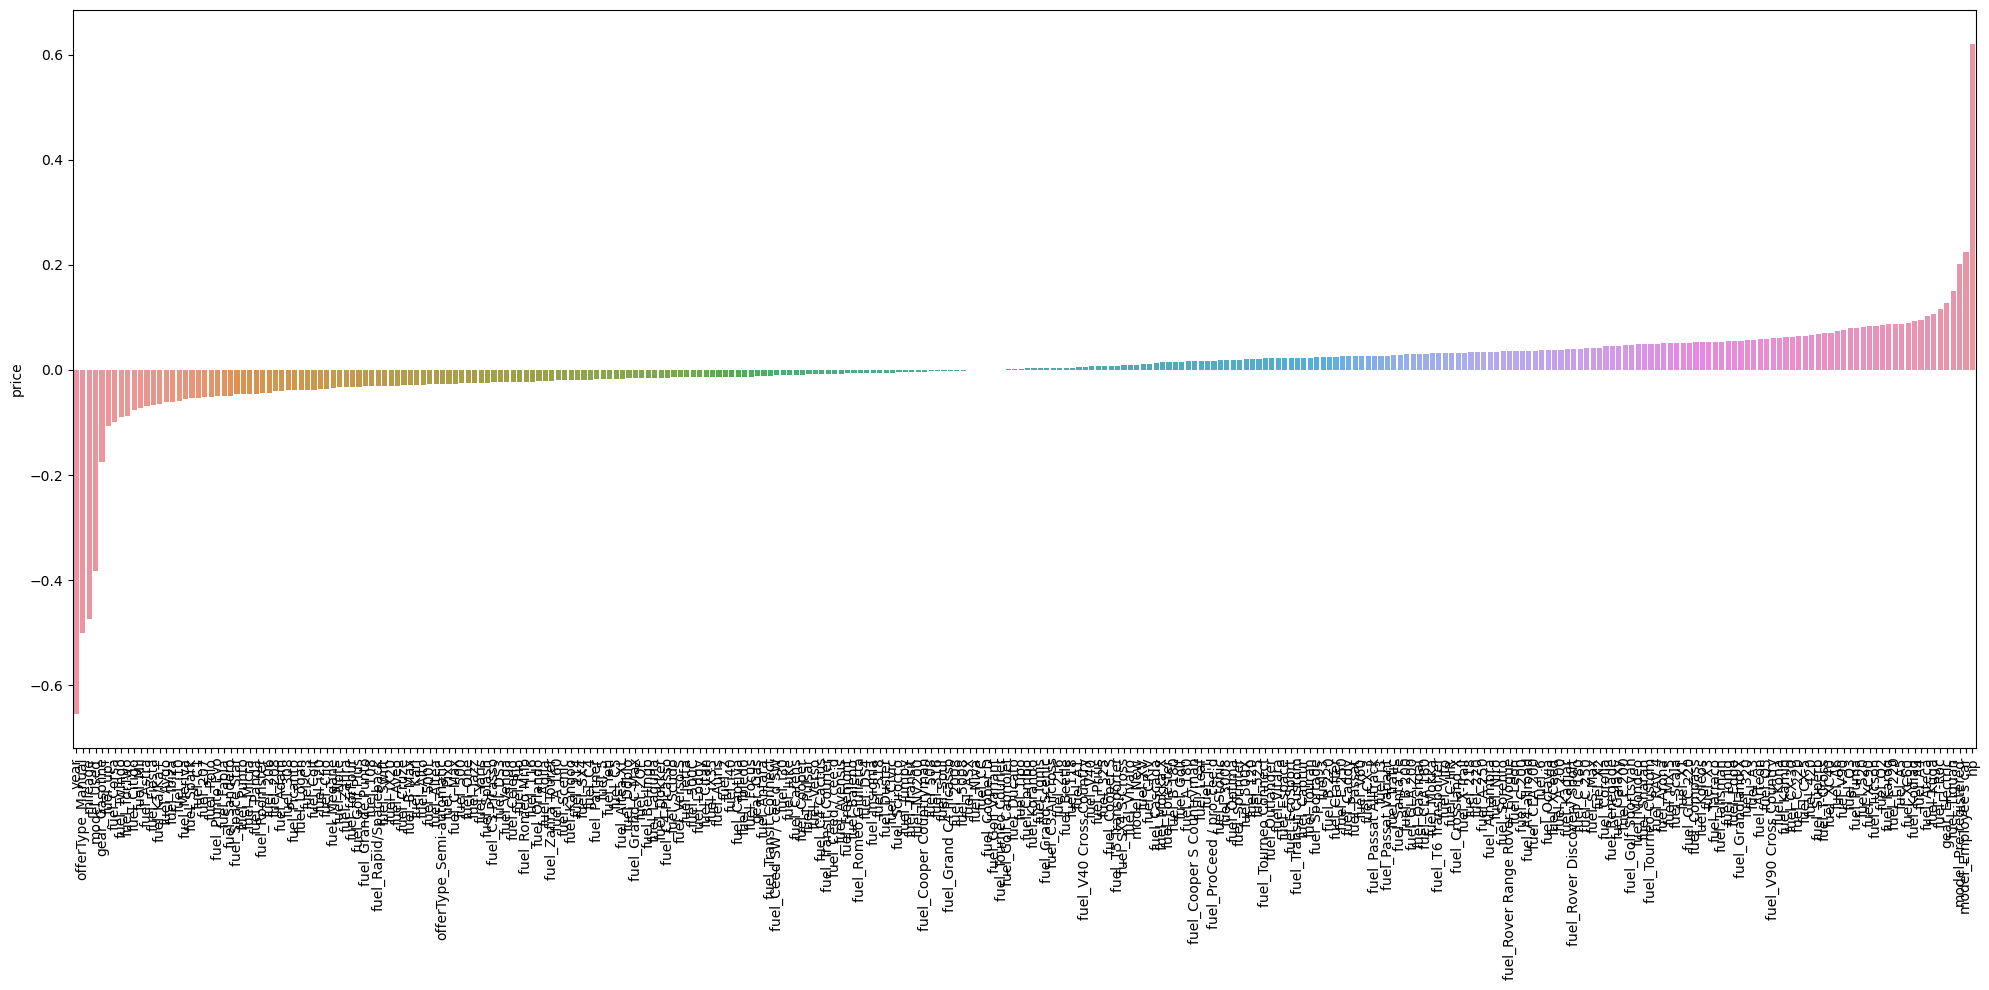

In [78]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

## Data Pre-Processing

In [79]:
df.head()

,mileage,hp,year,price,fuel_108,fuel_114,fuel_116,fuel_118,fuel_120,fuel_2,fuel_2008,fuel_206,fuel_207,fuel_208,fuel_216,fuel_218,fuel_220,fuel_3,fuel_3008,fuel_308,fuel_316,fuel_318,fuel_320,fuel_325,fuel_420,fuel_5,fuel_500,fuel_5008,fuel_500C,fuel_500L,fuel_500X,fuel_508,fuel_520,fuel_525,fuel_6,fuel_A 160,fuel_A 180,fuel_A 200,fuel_A 250,fuel_A1,fuel_A3,fuel_A4,fuel_A4 allroad,fuel_A5,fuel_A6,fuel_ASX,fuel_Adam,fuel_Agila,fuel_Alhambra,fuel_Altea,fuel_Altea XL,fuel_Alto,fuel_Antara,fuel_Arona,fuel_Arteon,fuel_Astra,fuel_Ateca,fuel_Auris,fuel_Avensis,fuel_Aveo,fuel_Aygo,fuel_B 180,fuel_B 200,fuel_B 220,fuel_B-Max,fuel_Baleno,fuel_Beetle,fuel_Berlingo,fuel_C 180,fuel_C 200,fuel_C 220,fuel_C 250,fuel_C-HR,fuel_C-Max,fuel_C1,fuel_C3,fuel_C3 Aircross,fuel_C3 Picasso,fuel_C4,fuel_C4 Cactus,fuel_C4 Picasso,fuel_C5,fuel_CC,fuel_CLA 180,fuel_CLA 200,fuel_CR-V,fuel_CX-3,fuel_CX-30,fuel_CX-5,fuel_Caddy,fuel_Captiva,fuel_Captur,fuel_Carens,fuel_Cascada,fuel_Ceed / cee'd,fuel_Ceed SW / cee'd SW,fuel_Celerio,fuel_Citan,fuel_Citigo,fuel_Civic,fuel_Clio,fuel_Colt,fuel_Combo,fuel_Compass,fuel_Cooper,fuel_Cooper Countryman,fuel_Cooper D,fuel_Cooper S,fuel_Cooper S Countryman,fuel_Corolla,fuel_Corsa,fuel_Crafter,fuel_Crossland X,fuel_Cruze,fuel_DS3,fuel_DS4,fuel_Doblo,fuel_Dokker,fuel_Ducato,fuel_Duster,fuel_E 200,fuel_E 220,fuel_E 250,fuel_EcoSport,fuel_Edge,fuel_Espace,fuel_Fabia,fuel_Fiesta,fuel_Focus,fuel_Forester,fuel_Freemont,fuel_GLA 200,fuel_GLC 220,fuel_Galaxy,fuel_Golf,fuel_Golf Cabriolet,fuel_Golf Plus,fuel_Golf Sportsvan,fuel_Golf Variant,fuel_Grand C-Max,fuel_Grand C4 Picasso,fuel_Grand Scenic,fuel_Grande Punto,fuel_Grandland X,fuel_Ibiza,fuel_Ignis,fuel_Insignia,fuel_Ioniq,fuel_Jazz,fuel_Jetta,fuel_Juke,fuel_Jumpy,fuel_Ka/Ka+,fuel_Kadjar,fuel_Kamiq,fuel_Kangoo,fuel_Karl,fuel_Karoq,fuel_Kodiaq,fuel_Koleos,fuel_Kona,fuel_Korando,fuel_Kuga,fuel_Laguna,fuel_Leaf,fuel_Leon,fuel_Lodgy,fuel_Logan,fuel_MX-5,fuel_Megane,fuel_Meriva,fuel_Micra,fuel_Mii,fuel_Mokka,fuel_Mokka X,fuel_Mondeo,fuel_NV200,fuel_Niro,fuel_Niva,fuel_Note,fuel_Octavia,fuel_One,fuel_Optima,fuel_Orlando,fuel_Outlander,fuel_Panda,fuel_Partner,fuel_Passat,fuel_Passat Alltrack,fuel_Passat Variant,fuel_Picanto,fuel_Pixo,fuel_Polo,fuel_Prius,fuel_ProCeed / pro_cee'd,fuel_Pulsar,fuel_Puma,fuel_Punto,fuel_Punto Evo,fuel_Q2,fuel_Q3,fuel_Q5,fuel_Qashqai,fuel_RAV 4,fuel_Rapid/Spaceback,fuel_Renegade,fuel_Rio,fuel_Romeo Giulietta,fuel_Romeo MiTo,fuel_Roomster,fuel_Rover Discovery Sport,fuel_Rover Range Rover Evoque,fuel_S-Max,fuel_SX4,fuel_SX4 S-Cross,fuel_Sandero,fuel_Santa Fe,fuel_Scala,fuel_Scenic,fuel_Scirocco,fuel_Scudo,fuel_Sharan,fuel_Sorento,fuel_Soul,fuel_Space Star,fuel_Spark,fuel_Splash,fuel_Sportage,fuel_Sprinter,fuel_Stonic,fuel_Superb,fuel_Swift,fuel_T-Cross,fuel_T-Roc,fuel_T5 Transporter,fuel_T6 Transporter,fuel_TT,fuel_Talisman,fuel_Tarraco,fuel_Tiguan,fuel_Tipo,fuel_Toledo,fuel_Touran,fuel_Tourneo Connect,fuel_Tourneo Courier,fuel_Tourneo Custom,fuel_Trafic,fuel_Transit,fuel_Transit Connect,fuel_Transit Courier,fuel_Transit Custom,fuel_Tucson,fuel_Twingo,fuel_V40,fuel_V40 Cross Country,fuel_V60,fuel_V90,fuel_V90 Cross Country,fuel_Venga,fuel_Verso,fuel_Verso-S,fuel_Vitara,fuel_Vito,fuel_Vivaro,fuel_X-Trail,fuel_X1,fuel_X2,fuel_X3,fuel_XC40,fuel_XC60,fuel_XC90,fuel_XCeed,fuel_XV,fuel_Yaris,fuel_Yeti,fuel_ZOE,fuel_Zafira,fuel_Zafira Tourer,fuel_forFour,fuel_forTwo,fuel_i10,fuel_i20,fuel_i3,fuel_i30,fuel_i40,fuel_iX20,fuel_iX35,fuel_up!,gear_Electric,gear_Gas,gear_Gasoline,offerType_Manual,offerType_Semi-automatic,model_Employee's car,model_New,model_Pre-registered,model_Used
0,235000,116.0,12,6800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [80]:
X= df.drop(columns="price")
y= df.price

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [82]:
X_train.shape

(31387, 296)

In [83]:
X_test.shape

(7847, 296)

## Linear Regression

In [84]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [85]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [86]:
pd.options.display.float_format = '{:.3f}'.format #daha rahat okunabilsin diye

In [87]:
train_val(lm, X_train, y_train, X_test, y_test)

,train,test
R2,0.909,0.908
mae,1613.691,1623.472
mse,4697341.652,4810749.658
rmse,2167.335,2193.342


## Cross Validate

In [88]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)

In [89]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.513,0.016,0.908,-1664.948,-4916096.331,-2217.227
1,0.453,0.016,0.906,-1626.845,-4888320.177,-2210.955
2,0.450,0.000,0.905,-1605.542,-4667914.159,-2160.536
3,0.453,0.016,0.912,-1598.944,-4477691.615,-2116.056
4,0.437,0.016,0.909,-1654.826,-4839388.139,-2199.861
5,0.596,0.011,0.905,-1637.214,-4904593.637,-2214.632
6,0.629,0.017,0.903,-1630.872,-5011282.346,-2238.589
7,0.643,0.016,0.910,-1612.862,-4817996.033,-2194.993
8,0.644,0.008,0.908,-1634.757,-4802306.600,-2191.417
9,0.470,0.016,0.905,-1648.466,-4771210.898,-2184.310


In [90]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                   0.907
test_neg_mean_absolute_error          -1631.528
test_neg_mean_squared_error        -4809679.993
test_neg_root_mean_squared_error      -2192.858
dtype: float64

In [91]:
train_val(lm, X_train, y_train, X_test, y_test)

,train,test
R2,0.909,0.908
mae,1613.691,1623.472
mse,4697341.652,4810749.658
rmse,2167.335,2193.342


In [92]:
2193/df.price.mean()

0.17550919770190843

In [93]:
y_pred = lm.predict(X_test)

## Prediction Error

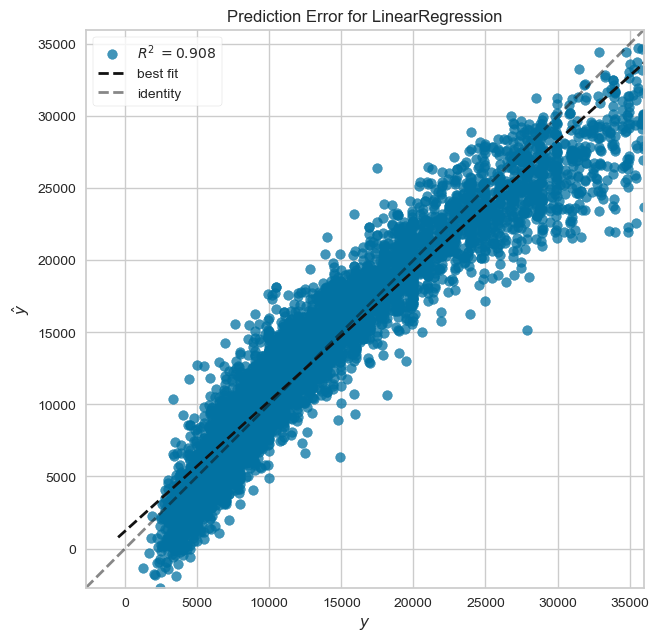

In [94]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

## Residual Plot

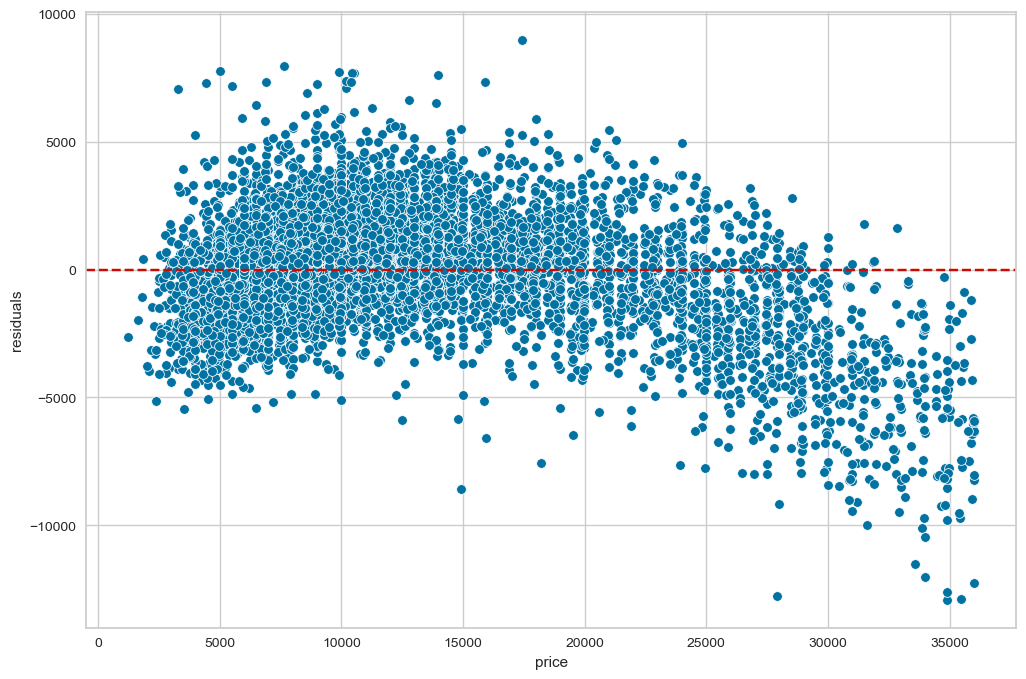

In [95]:
plt.figure(figsize=(12,8))
residuals = y_test-y_pred

sns.scatterplot(x = y_test, y = -residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

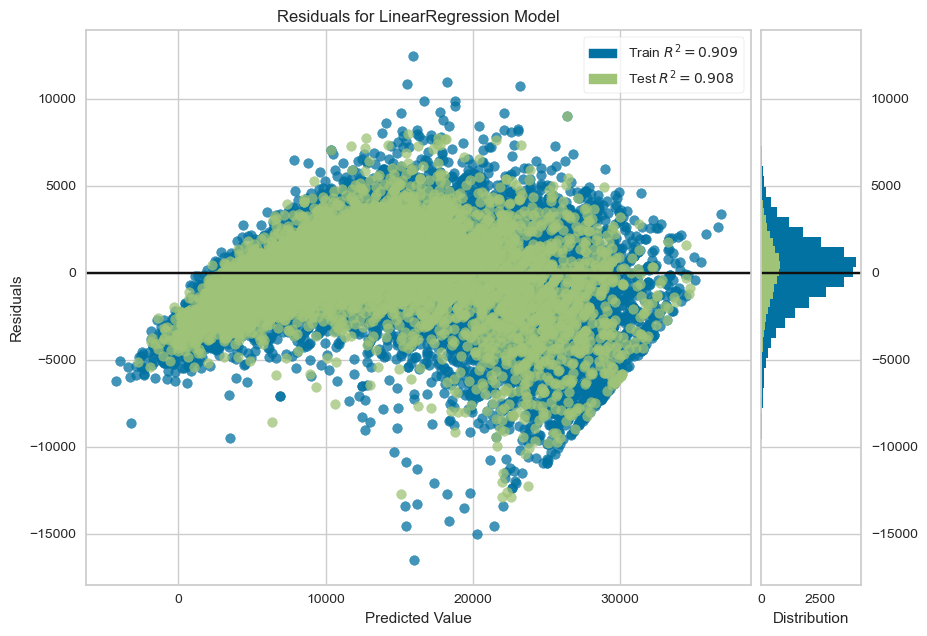

In [96]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();  

In [97]:
df2 = df[~(df.price>33000)]
df2

,mileage,hp,year,price,fuel_108,fuel_114,fuel_116,fuel_118,fuel_120,fuel_2,fuel_2008,fuel_206,fuel_207,fuel_208,fuel_216,fuel_218,fuel_220,fuel_3,fuel_3008,fuel_308,fuel_316,fuel_318,fuel_320,fuel_325,fuel_420,fuel_5,fuel_500,fuel_5008,fuel_500C,fuel_500L,fuel_500X,fuel_508,fuel_520,fuel_525,fuel_6,fuel_A 160,fuel_A 180,fuel_A 200,fuel_A 250,fuel_A1,fuel_A3,fuel_A4,fuel_A4 allroad,fuel_A5,fuel_A6,fuel_ASX,fuel_Adam,fuel_Agila,fuel_Alhambra,fuel_Altea,fuel_Altea XL,fuel_Alto,fuel_Antara,fuel_Arona,fuel_Arteon,fuel_Astra,fuel_Ateca,fuel_Auris,fuel_Avensis,fuel_Aveo,fuel_Aygo,fuel_B 180,fuel_B 200,fuel_B 220,fuel_B-Max,fuel_Baleno,fuel_Beetle,fuel_Berlingo,fuel_C 180,fuel_C 200,fuel_C 220,fuel_C 250,fuel_C-HR,fuel_C-Max,fuel_C1,fuel_C3,fuel_C3 Aircross,fuel_C3 Picasso,fuel_C4,fuel_C4 Cactus,fuel_C4 Picasso,fuel_C5,fuel_CC,fuel_CLA 180,fuel_CLA 200,fuel_CR-V,fuel_CX-3,fuel_CX-30,fuel_CX-5,fuel_Caddy,fuel_Captiva,fuel_Captur,fuel_Carens,fuel_Cascada,fuel_Ceed / cee'd,fuel_Ceed SW / cee'd SW,fuel_Celerio,fuel_Citan,fuel_Citigo,fuel_Civic,fuel_Clio,fuel_Colt,fuel_Combo,fuel_Compass,fuel_Cooper,fuel_Cooper Countryman,fuel_Cooper D,fuel_Cooper S,fuel_Cooper S Countryman,fuel_Corolla,fuel_Corsa,fuel_Crafter,fuel_Crossland X,fuel_Cruze,fuel_DS3,fuel_DS4,fuel_Doblo,fuel_Dokker,fuel_Ducato,fuel_Duster,fuel_E 200,fuel_E 220,fuel_E 250,fuel_EcoSport,fuel_Edge,fuel_Espace,fuel_Fabia,fuel_Fiesta,fuel_Focus,fuel_Forester,fuel_Freemont,fuel_GLA 200,fuel_GLC 220,fuel_Galaxy,fuel_Golf,fuel_Golf Cabriolet,fuel_Golf Plus,fuel_Golf Sportsvan,fuel_Golf Variant,fuel_Grand C-Max,fuel_Grand C4 Picasso,fuel_Grand Scenic,fuel_Grande Punto,fuel_Grandland X,fuel_Ibiza,fuel_Ignis,fuel_Insignia,fuel_Ioniq,fuel_Jazz,fuel_Jetta,fuel_Juke,fuel_Jumpy,fuel_Ka/Ka+,fuel_Kadjar,fuel_Kamiq,fuel_Kangoo,fuel_Karl,fuel_Karoq,fuel_Kodiaq,fuel_Koleos,fuel_Kona,fuel_Korando,fuel_Kuga,fuel_Laguna,fuel_Leaf,fuel_Leon,fuel_Lodgy,fuel_Logan,fuel_MX-5,fuel_Megane,fuel_Meriva,fuel_Micra,fuel_Mii,fuel_Mokka,fuel_Mokka X,fuel_Mondeo,fuel_NV200,fuel_Niro,fuel_Niva,fuel_Note,fuel_Octavia,fuel_One,fuel_Optima,fuel_Orlando,fuel_Outlander,fuel_Panda,fuel_Partner,fuel_Passat,fuel_Passat Alltrack,fuel_Passat Variant,fuel_Picanto,fuel_Pixo,fuel_Polo,fuel_Prius,fuel_ProCeed / pro_cee'd,fuel_Pulsar,fuel_Puma,fuel_Punto,fuel_Punto Evo,fuel_Q2,fuel_Q3,fuel_Q5,fuel_Qashqai,fuel_RAV 4,fuel_Rapid/Spaceback,fuel_Renegade,fuel_Rio,fuel_Romeo Giulietta,fuel_Romeo MiTo,fuel_Roomster,fuel_Rover Discovery Sport,fuel_Rover Range Rover Evoque,fuel_S-Max,fuel_SX4,fuel_SX4 S-Cross,fuel_Sandero,fuel_Santa Fe,fuel_Scala,fuel_Scenic,fuel_Scirocco,fuel_Scudo,fuel_Sharan,fuel_Sorento,fuel_Soul,fuel_Space Star,fuel_Spark,fuel_Splash,fuel_Sportage,fuel_Sprinter,fuel_Stonic,fuel_Superb,fuel_Swift,fuel_T-Cross,fuel_T-Roc,fuel_T5 Transporter,fuel_T6 Transporter,fuel_TT,fuel_Talisman,fuel_Tarraco,fuel_Tiguan,fuel_Tipo,fuel_Toledo,fuel_Touran,fuel_Tourneo Connect,fuel_Tourneo Courier,fuel_Tourneo Custom,fuel_Trafic,fuel_Transit,fuel_Transit Connect,fuel_Transit Courier,fuel_Transit Custom,fuel_Tucson,fuel_Twingo,fuel_V40,fuel_V40 Cross Country,fuel_V60,fuel_V90,fuel_V90 Cross Country,fuel_Venga,fuel_Verso,fuel_Verso-S,fuel_Vitara,fuel_Vito,fuel_Vivaro,fuel_X-Trail,fuel_X1,fuel_X2,fuel_X3,fuel_XC40,fuel_XC60,fuel_XC90,fuel_XCeed,fuel_XV,fuel_Yaris,fuel_Yeti,fuel_ZOE,fuel_Zafira,fuel_Zafira Tourer,fuel_forFour,fuel_forTwo,fuel_i10,fuel_i20,fuel_i3,fuel_i30,fuel_i40,fuel_iX20,fuel_iX35,fuel_up!,gear_Electric,gear_Gas,gear_Gasoline,offerType_Manual,offerType_Semi-automatic,model_Employee's car,model_New,model_Pre-registered,model_Used
0,235000,116.000,12,6800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [98]:
len(df[df.price>33000])

533

In [99]:
X = df2.drop(columns = "price")
y = df2.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [100]:
lm2 = LinearRegression()
lm2.fit(X_train,y_train)

LinearRegression()

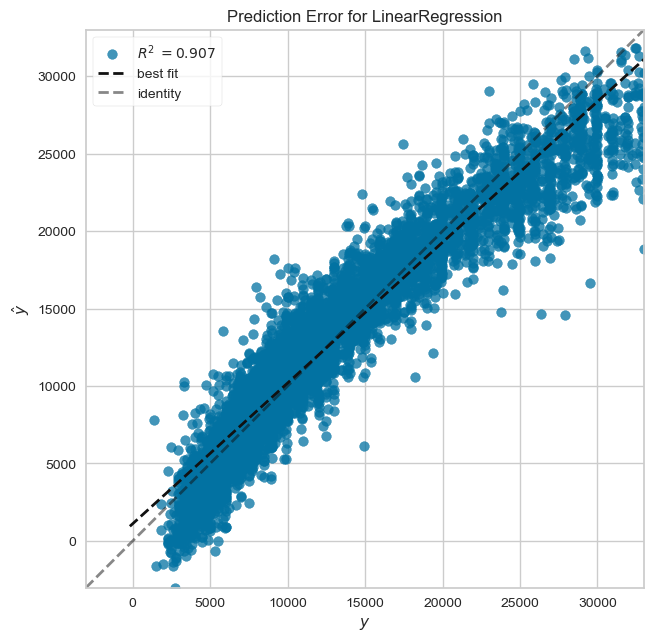

In [101]:
visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

In [102]:
train_val(lm2, X_train, y_train, X_test, y_test)

,train,test
R2,0.909,0.907
mae,1533.572,1524.346
mse,4153716.221,4204285.186
rmse,2038.067,2050.435


In [103]:
2050/df2.price.mean()

0.16817049371111703

In [104]:
y_pred = lm2.predict(X_test)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [105]:
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [106]:
compare.sample(20)

,Actual,Pred,Residual
40008,13000,17455.381,-4455.381
44839,16450,17553.626,-1103.626
5345,9999,10388.378,-389.378
5438,8990,11253.088,-2263.088
36476,11985,13501.989,-1516.989
19267,5500,3090.168,2409.832
3725,8390,10018.675,-1628.675
38032,17799,19795.015,-1996.015
33398,17990,17066.195,923.805
28635,21500,19636.415,1863.585


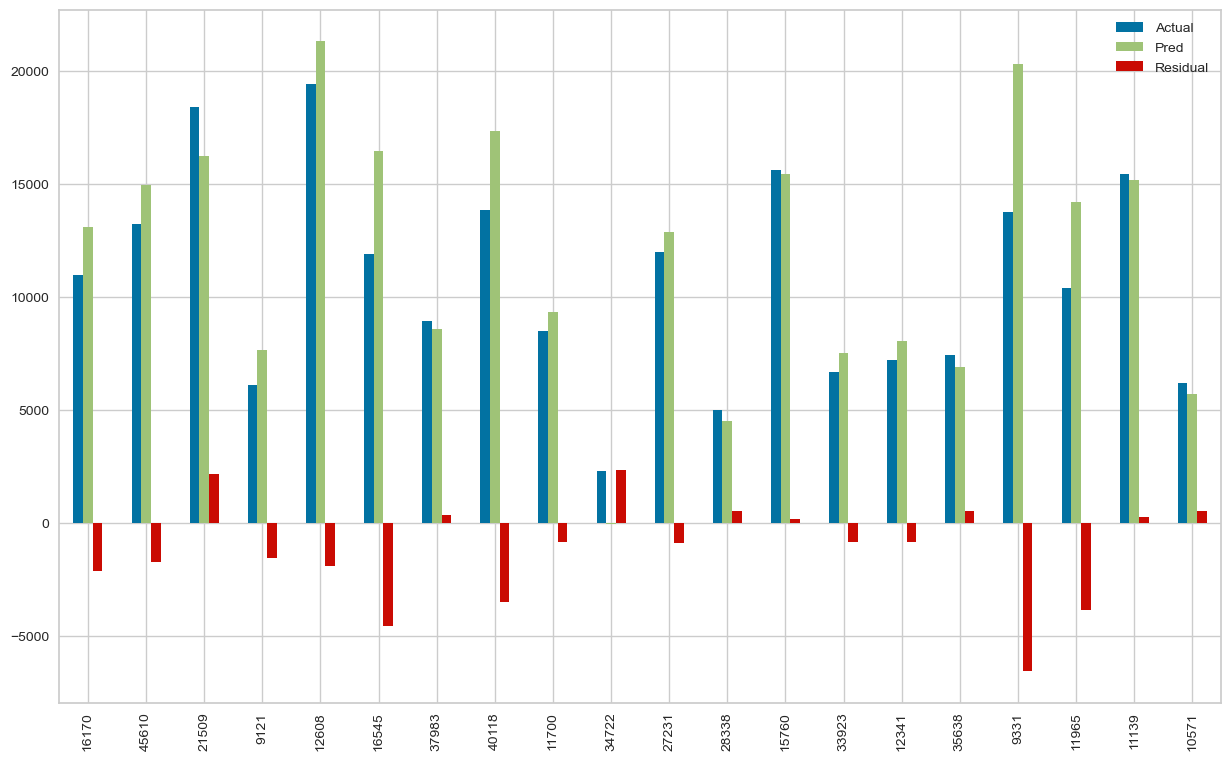

In [107]:
compare.sample(20).plot(kind='bar',figsize=(15,9))
plt.show()

## Ridge Regression

Scaling

In [108]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [109]:
from sklearn.linear_model import Ridge, RidgeCV

In [110]:
ridge_model = Ridge(random_state=42)

In [111]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(random_state=42)

In [112]:
train_val(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.909,0.907
mae,1536.916,1526.851
mse,4165200.771,4215613.066
rmse,2040.882,2053.196


In [113]:
from sklearn.model_selection import GridSearchCV

In [114]:
alpha_space = np.linspace(0.01, 100, 100)
alpha_space

array([  0.01,   1.02,   2.03,   3.04,   4.05,   5.06,   6.07,   7.08,
         8.09,   9.1 ,  10.11,  11.12,  12.13,  13.14,  14.15,  15.16,
        16.17,  17.18,  18.19,  19.2 ,  20.21,  21.22,  22.23,  23.24,
        24.25,  25.26,  26.27,  27.28,  28.29,  29.3 ,  30.31,  31.32,
        32.33,  33.34,  34.35,  35.36,  36.37,  37.38,  38.39,  39.4 ,
        40.41,  41.42,  42.43,  43.44,  44.45,  45.46,  46.47,  47.48,
        48.49,  49.5 ,  50.51,  51.52,  52.53,  53.54,  54.55,  55.56,
        56.57,  57.58,  58.59,  59.6 ,  60.61,  61.62,  62.63,  63.64,
        64.65,  65.66,  66.67,  67.68,  68.69,  69.7 ,  70.71,  71.72,
        72.73,  73.74,  74.75,  75.76,  76.77,  77.78,  78.79,  79.8 ,
        80.81,  81.82,  82.83,  83.84,  84.85,  85.86,  86.87,  87.88,
        88.89,  89.9 ,  90.91,  91.92,  92.93,  93.94,  94.95,  95.96,
        96.97,  97.98,  98.99, 100.  ])

In [115]:
ridge_model = Ridge(random_state=42)

param_grid = {'alpha':alpha_space}

ridge_grid_model = GridSearchCV(estimator=ridge_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [116]:
ridge_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([  0.01,   1.02,   2.03,   3.04,   4.05,   5.06,   6.07,   7.08,
         8.09,   9.1 ,  10.11,  11.12,  12.13,  13.14,  14.15,  15.16,
        16.17,  17.18,  18.19,  19.2 ,  20.21,  21.22,  22.23,  23.24,
        24.25,  25.26,  26.27,  27.28,  28.29,  29.3 ,  30.31,  31.32,
        32.33,  33.34,  34.35,  35.36,  36.37,  37.38,  38.39,  39.4 ,
        40.41,  41.42,  42.43,  43.44,  44.45,  45.46...48,
        48.49,  49.5 ,  50.51,  51.52,  52.53,  53.54,  54.55,  55.56,
        56.57,  57.58,  58.59,  59.6 ,  60.61,  61.62,  62.63,  63.64,
        64.65,  65.66,  66.67,  67.68,  68.69,  69.7 ,  70.71,  71.72,
        72.73,  73.74,  74.75,  75.76,  76.77,  77.78,  78.79,  79.8 ,
        80.81,  81.82,  82.83,  83.84,  84.85,  85.86,  86.87,  87.88,
        88.89,  89.9 ,  90.91,  91.92,  92.93,  93.94,  94.95,  95.96,
        96.97,  97.98,  98.99, 100.  ])},
             scori

In [117]:
ridge_grid_model.best_params_

{'alpha': 0.01}

In [118]:
pd.DataFrame(ridge_grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.459,0.033,0.003,0.002,0.010,{'alpha': 0.01},-2035.160,-2007.077,-2037.149,-2143.173,-2052.836,-2115.677,-2015.468,-2058.057,-2082.290,-2086.814,-2063.370,41.350,1
1,0.444,0.024,0.005,0.006,1.020,{'alpha': 1.02},-2035.583,-2007.012,-2038.877,-2143.990,-2055.123,-2118.269,-2020.251,-2060.752,-2089.721,-2088.931,-2065.851,41.572,2
2,0.429,0.018,0.003,0.006,2.030,{'alpha': 2.03},-2037.843,-2009.490,-2040.514,-2146.297,-2057.881,-2121.521,-2026.342,-2062.672,-2093.854,-2091.882,-2068.830,41.450,3
3,0.429,0.018,0.008,0.007,3.040,{'alpha': 3.04},-2041.056,-2013.228,-2043.248,-2149.736,-2061.928,-2125.627,-2033.111,-2065.706,-2098.730,-2095.901,-2072.827,41.339,4
4,0.420,0.021,0.005,0.007,4.050,{'alpha': 4.05},-2044.865,-2017.758,-2046.725,-2153.893,-2066.759,-2130.268,-2040.158,-2069.494,-2104.052,-2100.607,-2077.458,41.249,5
5,0.425,0.018,0.005,0.007,5.060,{'alpha': 5.06},-2049.034,-2022.770,-2050.681,-2158.496,-2072.043,-2135.226,-2047.283,-2073.755,-2109.613,-2105.741,-2082.464,41.179,6
6,0.412,0.008,0.003,0.006,6.070,{'alpha': 6.07},-2053.415,-2028.063,-2054.939,-2163.364,-2077.570,-2140.356,-2054.372,-2078.301,-2115.278,-2111.130,-2087.679,41.127,7
7,0.423,0.011,0.003,0.006,7.080,{'alpha': 7.08},-2057.909,-2033.505,-2059.377,-2168.377,-2083.208,-2145.564,-2061.358,-2083.007,-2120.960,-2116.657,-2092.992,41.091,8
8,0.420,0.011,0.008,0.008,8.090,{'alpha': 8.09},-2062.452,-2039.007,-2063.913,-2173.454,-2088.871,-2150.787,-2068.201,-2087.788,-2126.606,-2122.244,-2098.332,41.068,9
9,0.431,0.012,0.005,0.007,9.100,{'alpha': 9.1},-2066.999,-2044.511,-2068.491,-2178.541,-2094.504,-2155.983,-2074.876,-2092.589,-2132.182,-2127.836,-2103.651,41.058,10


In [119]:
ridge_grid_model.best_index_

0

In [120]:
ridge_grid_model.best_score_

-2063.3701974034775

In [121]:
train_val(ridge_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.909,0.907
mae,1533.647,1524.451
mse,4153773.975,4204570.580
rmse,2038.081,2050.505


In [122]:
y_pred = ridge_grid_model.predict(X_test_scaled)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [123]:
ridge = Ridge(alpha=0.01, random_state=42).fit(X_train_scaled, y_train)

pd.DataFrame(ridge.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
mileage,-9303.819
year,-8361.081
fuel_Space Star,-3283.634
fuel_Celerio,-3183.352
fuel_ZOE,-2667.357
fuel_108,-2575.294
model_New,-2455.357
fuel_Aygo,-2304.788
fuel_Baleno,-2241.423
fuel_Ignis,-2069.923


## Lasso Regression

In [124]:
from sklearn.linear_model import Lasso, LassoCV

In [125]:
lasso_model = Lasso(random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(random_state=42)

In [126]:
train_val(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.903,0.901
mae,1590.025,1579.206
mse,4442609.902,4473282.931
rmse,2107.750,2115.014


## Best alpha

In [127]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha':alpha_space}

lasso_grid_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [128]:
lasso_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([  0.01,   1.02,   2.03,   3.04,   4.05,   5.06,   6.07,   7.08,
         8.09,   9.1 ,  10.11,  11.12,  12.13,  13.14,  14.15,  15.16,
        16.17,  17.18,  18.19,  19.2 ,  20.21,  21.22,  22.23,  23.24,
        24.25,  25.26,  26.27,  27.28,  28.29,  29.3 ,  30.31,  31.32,
        32.33,  33.34,  34.35,  35.36,  36.37,  37.38,  38.39,  39.4 ,
        40.41,  41.42,  42.43,  43.44,  44.45,  45.46...48,
        48.49,  49.5 ,  50.51,  51.52,  52.53,  53.54,  54.55,  55.56,
        56.57,  57.58,  58.59,  59.6 ,  60.61,  61.62,  62.63,  63.64,
        64.65,  65.66,  66.67,  67.68,  68.69,  69.7 ,  70.71,  71.72,
        72.73,  73.74,  74.75,  75.76,  76.77,  77.78,  78.79,  79.8 ,
        80.81,  81.82,  82.83,  83.84,  84.85,  85.86,  86.87,  87.88,
        88.89,  89.9 ,  90.91,  91.92,  92.93,  93.94,  94.95,  95.96,
        96.97,  97.98,  98.99, 100.  ])},
             scori

In [129]:
lasso_grid_model.best_params_

{'alpha': 0.01}

In [130]:
lasso_grid_model.best_score_

-2063.5320878814177

In [131]:
train_val(lasso_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.909,0.907
mae,1534.033,1524.718
mse,4154672.339,4205978.505
rmse,2038.301,2050.848


In [132]:
y_pred = lasso_grid_model.predict(X_test_scaled)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [133]:
lasso = Lasso(alpha=0.01, random_state=42).fit(X_train_scaled, y_train)
pd.DataFrame(lasso.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
mileage,-9300.324
year,-8364.641
fuel_Space Star,-3967.571
fuel_Celerio,-3856.179
fuel_ZOE,-3352.416
fuel_108,-3259.248
fuel_Aygo,-2988.886
fuel_Baleno,-2911.775
fuel_C1,-2752.796
fuel_Karl,-2749.930


## Elastic-Net

In [134]:
from sklearn.linear_model import ElasticNet

In [135]:
elastic_model = ElasticNet(random_state=42)
elastic_model.fit(X_train_scaled,y_train)

ElasticNet(random_state=42)

In [136]:
train_val(elastic_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.320,0.327
mae,4367.113,4306.885
mse,31192668.892,30528570.629
rmse,5585.040,5525.267


## Best Alpha and l1_ratio

In [137]:
elastic_model = ElasticNet(random_state=42)

In [138]:
param_grid = {'alpha':[0.01,0.1,1.02, 2,  3, 4, 5, 7, 10, 11],
              'l1_ratio':[.5, .7, .9, .95, .99, 1]}

elastic_grid_model = GridSearchCV(estimator=elastic_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [139]:
elastic_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1.02, 2, 3, 4, 5, 7, 10, 11],
                         'l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [140]:
elastic_grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [141]:
elastic_grid_model.best_score_

-2063.5320878814177

In [142]:
train_val(elastic_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.909,0.907
mae,1534.033,1524.718
mse,4154672.339,4205978.505
rmse,2038.301,2050.848


In [143]:
y_pred = elastic_grid_model.predict(X_test_scaled)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

## Feature Importance

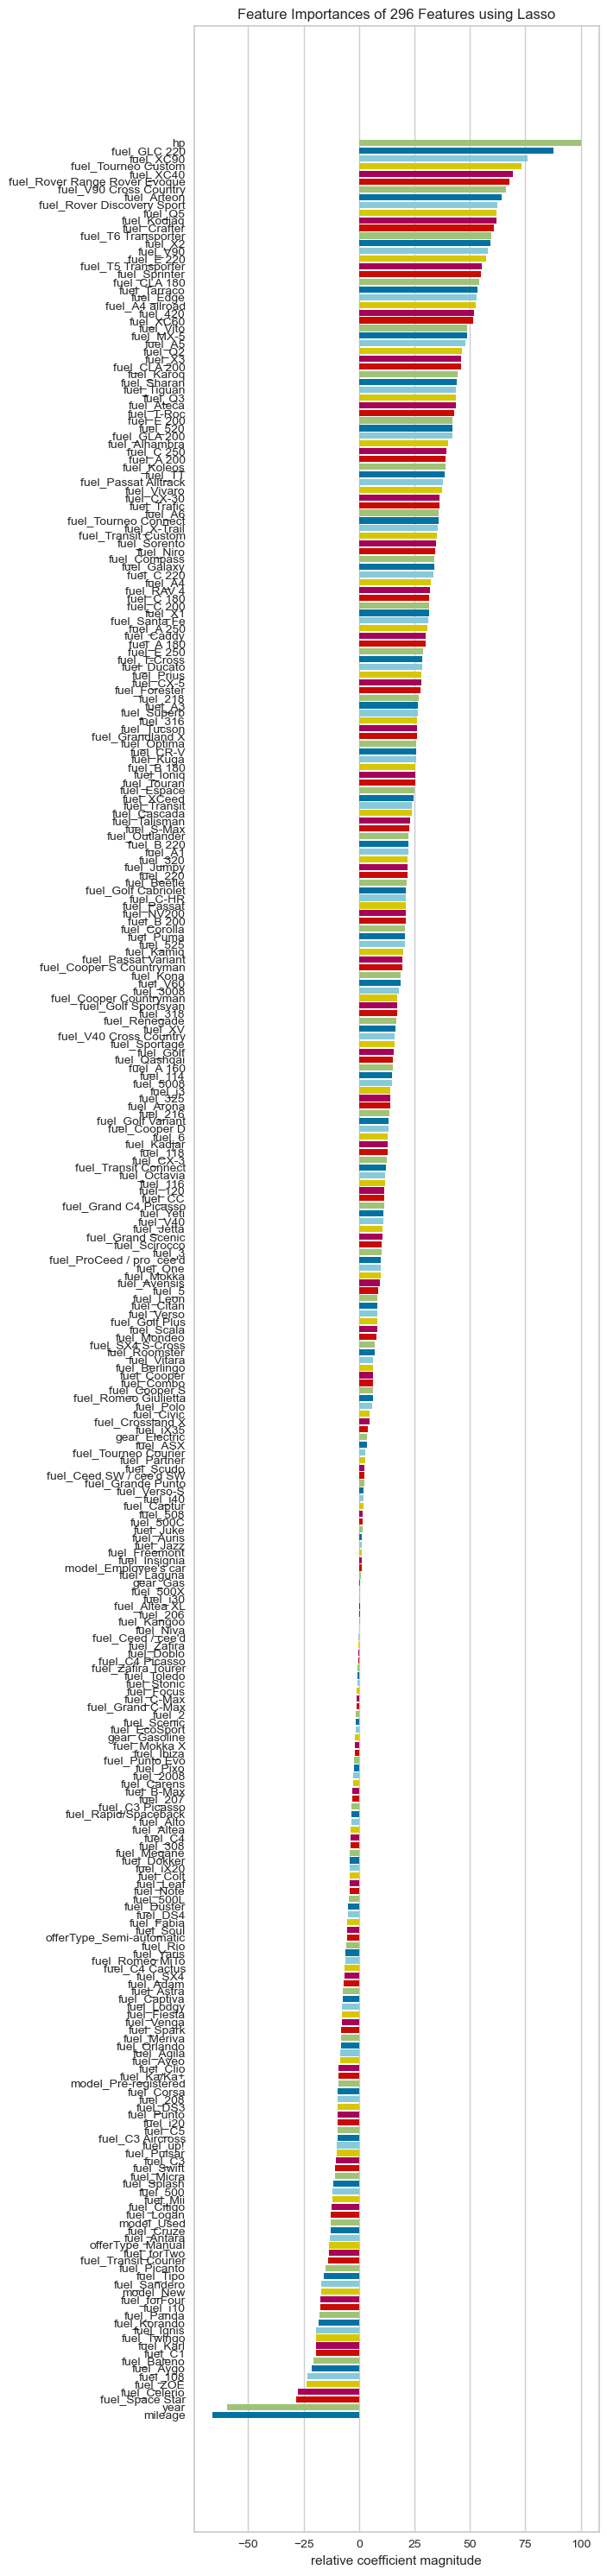

In [144]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz


viz = FeatureImportances(Lasso(alpha=0.01), labels=X_train.columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

In [145]:
df1.make.unique()

array(['BMW', 'Volkswagen', 'Renault', 'Peugeot', 'Toyota', 'Opel',
       'Mazda', 'Ford', 'Chevrolet', 'Audi', 'Kia', 'Dacia',
       'Mercedes-Benz', 'MINI', 'Hyundai', 'SEAT', 'Skoda', 'Citroen',
       'Suzuki', 'SsangYong', 'smart', 'Fiat', 'Nissan', 'Honda',
       'Mitsubishi', 'Volvo', 'Land', 'Alfa', 'Jeep', 'Subaru', 'Abarth',
       'Lada', 'Cupra'], dtype=object)

In [146]:
df1.model.unique()

array(['316', 'Golf', 'Megane', '308', 'Auris', 'Scenic', 'Zafira', '3',
       'Transit', 'Meriva', 'Orlando', 'A4', 'Polo', 'Espace', 'Corsa',
       'Picanto', 'Duster', 'Beetle', 'Golf Cabriolet', 'Astra', '118',
       'Focus', 'B 180', 'Insignia', 'One', '320', 'iX35', 'Adam',
       'B-Max', 'Golf Variant', 'Touran', '114', 'Galaxy', 'Leon', 'A1',
       'Verso', 'Golf Plus', 'Fiesta', 'Vivaro', 'Yaris', 'iX20', 'up!',
       'Rapid/Spaceback', '116', 'Passat Variant', "Ceed / cee'd",
       'Fabia', 'Ibiza', 'C-Max', 'Superb', 'C4 Cactus', '208', 'Swift',
       'Korando', 'Sandero', '2', 'Sorento', 'GLC 220', 'forTwo', 'Mii',
       'Citigo', 'Aygo', 'Punto', 'i10', 'forFour', 'A4 allroad', 'Q2',
       'A6', 'Tiguan', 'X2', 'T-Roc', 'Vito', 'Ateca', 'Kuga', 'Karoq',
       'Alhambra', 'Panda', '508', 'Qashqai', 'Civic', 'Passat',
       'Avensis', 'Octavia', 'Altea', 'Mondeo', 'Jetta', 'i40',
       'Grand C4 Picasso', '2008', 'SX4', 'Jazz', 'i20', 'Yeti',
       'Roomster', 

In [147]:
df_new = df1[["mileage","make", "fuel", "gear","offerType", "hp", "year","price"]]

In [148]:
df_new

,mileage,make,fuel,gear,offerType,hp,year,price
0,235000,BMW,Diesel,Manual,Used,116.000,12,6800
1,92800,Volkswagen,Gasoline,Manual,Used,122.000,12,6877
3,96200,Renault,Gasoline,Manual,Used,110.000,12,6950
4,156000,Peugeot,Gasoline,Manual,Used,156.000,12,6950
5,147000,Toyota,Electric,Automatic,Used,99.000,12,6950
...,...,...,...,...,...,...,...,...
46400,99,Fiat,Electric,Manual,Pre-registered,71.000,2,12990
46401,99,Fiat,Electric,Manual,Pre-registered,71.000,2,12990
46402,99,Fiat,Electric,Manual,Pre-registered,71.000,2,12990
46403,99,Fiat,Electric,Manual,Pre-registered,71.000,2,12990


In [149]:
df_new = df_new[~(df_new.price>33000)]

In [150]:
df_new = pd.get_dummies(df_new)
df_new

,mileage,hp,year,price,make_Abarth,make_Alfa,make_Audi,make_BMW,make_Chevrolet,make_Citroen,make_Cupra,make_Dacia,make_Fiat,make_Ford,make_Honda,make_Hyundai,make_Jeep,make_Kia,make_Lada,make_Land,make_MINI,make_Mazda,make_Mercedes-Benz,make_Mitsubishi,make_Nissan,make_Opel,make_Peugeot,make_Renault,make_SEAT,make_Skoda,make_SsangYong,make_Subaru,make_Suzuki,make_Toyota,make_Volkswagen,make_Volvo,make_smart,fuel_Diesel,fuel_Electric,fuel_Gas,fuel_Gasoline,gear_Automatic,gear_Manual,gear_Semi-automatic,offerType_Demonstration,offerType_Employee's car,offerType_New,offerType_Pre-registered,offerType_Used
0,235000,116.000,12,6800,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1,92800,122.000,12,6877,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
3,96200,110.000,12,6950,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
4,156000,156.000,12,6950,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
5,147000,99.000,12,6950,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46400,99,71.000,2,12990,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
46401,99,71.000,2,12990,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
46402,99,71.000,2,12990,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
46403,99,71.000,2,12990,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [151]:
df_new.columns

Index(['mileage', 'hp', 'year', 'price', 'make_Abarth', 'make_Alfa',
       'make_Audi', 'make_BMW', 'make_Chevrolet', 'make_Citroen', 'make_Cupra',
       'make_Dacia', 'make_Fiat', 'make_Ford', 'make_Honda', 'make_Hyundai',
       'make_Jeep', 'make_Kia', 'make_Lada', 'make_Land', 'make_MINI',
       'make_Mazda', 'make_Mercedes-Benz', 'make_Mitsubishi', 'make_Nissan',
       'make_Opel', 'make_Peugeot', 'make_Renault', 'make_SEAT', 'make_Skoda',
       'make_SsangYong', 'make_Subaru', 'make_Suzuki', 'make_Toyota',
       'make_Volkswagen', 'make_Volvo', 'make_smart', 'fuel_Diesel',
       'fuel_Electric', 'fuel_Gas', 'fuel_Gasoline', 'gear_Automatic',
       'gear_Manual', 'gear_Semi-automatic', 'offerType_Demonstration',
       'offerType_Employee's car', 'offerType_New', 'offerType_Pre-registered',
       'offerType_Used'],
      dtype='object')

In [152]:
len(df_new)

38701

In [153]:
X = df_new.drop(columns = ["price"])
y = df_new.price

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [155]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [156]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha':alpha_space}

lasso_final_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [157]:
lasso_final_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([  0.01,   1.02,   2.03,   3.04,   4.05,   5.06,   6.07,   7.08,
         8.09,   9.1 ,  10.11,  11.12,  12.13,  13.14,  14.15,  15.16,
        16.17,  17.18,  18.19,  19.2 ,  20.21,  21.22,  22.23,  23.24,
        24.25,  25.26,  26.27,  27.28,  28.29,  29.3 ,  30.31,  31.32,
        32.33,  33.34,  34.35,  35.36,  36.37,  37.38,  38.39,  39.4 ,
        40.41,  41.42,  42.43,  43.44,  44.45,  45.46...48,
        48.49,  49.5 ,  50.51,  51.52,  52.53,  53.54,  54.55,  55.56,
        56.57,  57.58,  58.59,  59.6 ,  60.61,  61.62,  62.63,  63.64,
        64.65,  65.66,  66.67,  67.68,  68.69,  69.7 ,  70.71,  71.72,
        72.73,  73.74,  74.75,  75.76,  76.77,  77.78,  78.79,  79.8 ,
        80.81,  81.82,  82.83,  83.84,  84.85,  85.86,  86.87,  87.88,
        88.89,  89.9 ,  90.91,  91.92,  92.93,  93.94,  94.95,  95.96,
        96.97,  97.98,  98.99, 100.  ])},
             scori

In [158]:
lasso_final_model.best_params_

{'alpha': 0.01}

In [159]:
lasso_final_model.best_score_

-2463.137940770769

In [160]:
train_val(lasso_final_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.868,0.868
mae,1860.213,1842.501
mse,6048219.066,5997906.229
rmse,2459.313,2449.062


In [161]:
2449/df_new.price.mean()

0.20090221419440274

In [162]:
y_pred = lasso_final_model.predict(X_test_scaled)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

 ## Visually Compare Models Performance In a Graph

In [163]:
scores = {"linear_m": {"r2_score": lm_R2 , 
 "mae": lm_mae, 
 "rmse": lm_rmse},

 "ridge_m": {"r2_score": rm_R2, 
 "mae": rm_mae,
 "rmse": rm_rmse},
    
 "lasso_m": {"r2_score": lasm_R2, 
 "mae": lasm_mae, 
 "rmse": lasm_rmse},

 "elastic_m": {"r2_score": em_R2, 
 "mae": em_mae, 
 "rmse": em_rmse},
         
 "final_m": {"r2_score": fm_R2, 
 "mae": fm_mae , 
 "rmse": fm_rmse}}
scores = pd.DataFrame(scores).T
scores

,r2_score,mae,rmse
linear_m,0.907,1524.346,2050.435
ridge_m,0.907,1524.451,2050.505
lasso_m,0.907,1524.718,2050.848
elastic_m,0.907,1524.718,2050.848
final_m,0.868,1842.501,2449.062


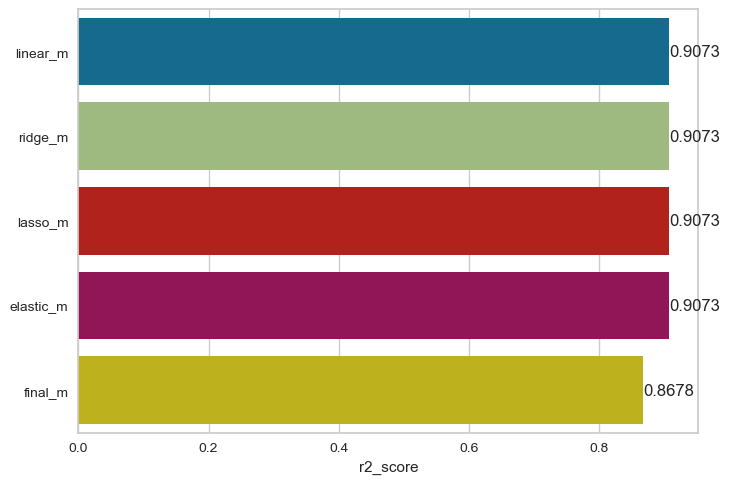

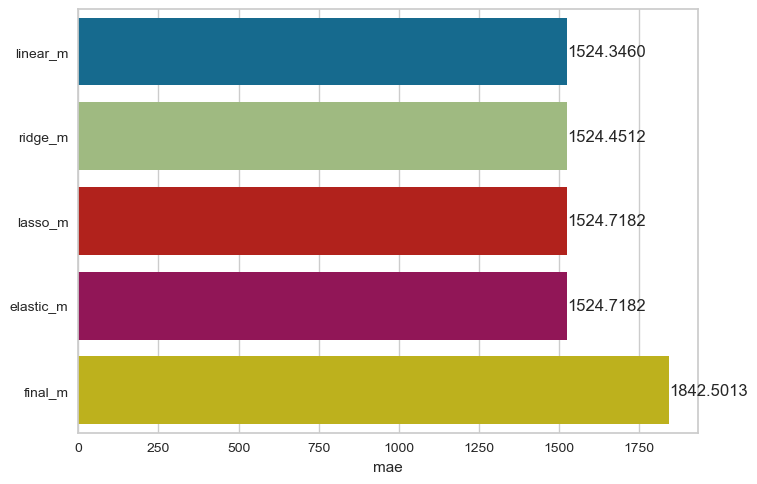

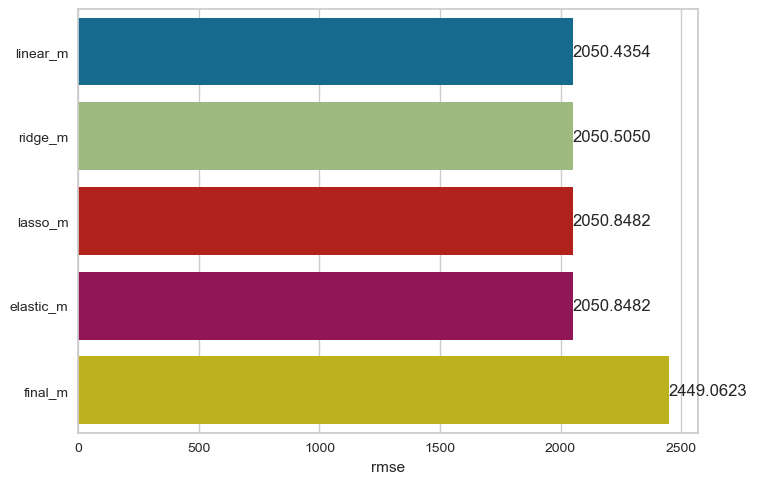

In [164]:
#metrics = scores.columns
for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False
    else:
        ascending = True
    compare = scores.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    for p in ax.patches:
            width = p.get_width()                        # get bar length
            ax.text(width,                               # set the text at 1 unit right of the bar
                    p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                    '{:.4f}'.format(width),             # set variable to display, 2 decimals
                    ha = 'left',                         # horizontal alignment
                    va = 'center') 

## Prediction

In [165]:
final_scaler = MinMaxScaler()
final_scaler.fit(X)
X_scaled = final_scaler.transform(X)

In [166]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha':alpha_space}

final_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [167]:
final_model.fit(X_scaled,y)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([  0.01,   1.02,   2.03,   3.04,   4.05,   5.06,   6.07,   7.08,
         8.09,   9.1 ,  10.11,  11.12,  12.13,  13.14,  14.15,  15.16,
        16.17,  17.18,  18.19,  19.2 ,  20.21,  21.22,  22.23,  23.24,
        24.25,  25.26,  26.27,  27.28,  28.29,  29.3 ,  30.31,  31.32,
        32.33,  33.34,  34.35,  35.36,  36.37,  37.38,  38.39,  39.4 ,
        40.41,  41.42,  42.43,  43.44,  44.45,  45.46...48,
        48.49,  49.5 ,  50.51,  51.52,  52.53,  53.54,  54.55,  55.56,
        56.57,  57.58,  58.59,  59.6 ,  60.61,  61.62,  62.63,  63.64,
        64.65,  65.66,  66.67,  67.68,  68.69,  69.7 ,  70.71,  71.72,
        72.73,  73.74,  74.75,  75.76,  76.77,  77.78,  78.79,  79.8 ,
        80.81,  81.82,  82.83,  83.84,  84.85,  85.86,  86.87,  87.88,
        88.89,  89.9 ,  90.91,  91.92,  92.93,  93.94,  94.95,  95.96,
        96.97,  97.98,  98.99, 100.  ])},
             scori

In [168]:
final_model.best_estimator_

Lasso(alpha=0.01, random_state=42)

In [169]:
import pickle
pickle.dump(final_model, open("final_model", 'wb'))

In [170]:
final_model = pickle.load(open("final_model", "rb"))

In [171]:
import joblib
joblib.dump(final_scaler,"final_scaler")

['final_scaler']

In [172]:
joblib.load("final_scaler")

MinMaxScaler()

In [173]:
my_dict = {
    "make": "Citroen",
    "mileage": 110000,
    "fuel":"Electric",
    "gear":"Manuel",
    "offerType":"Used",
    "hp": 122.0,
    "year": 5
}

In [174]:
my_dict = pd.DataFrame([my_dict])
my_dict

,make,mileage,fuel,gear,offerType,hp,year
0,Citroen,110000,Electric,Manuel,Used,122.000,5


In [175]:
my_dict = pd.get_dummies(my_dict)
my_dict

,mileage,hp,year,make_Citroen,fuel_Electric,gear_Manuel,offerType_Used
0,110000,122.000,5,1,1,1,1


In [176]:
my_dict = my_dict.reindex(columns = X.columns, fill_value=0)
my_dict

,mileage,hp,year,make_Abarth,make_Alfa,make_Audi,make_BMW,make_Chevrolet,make_Citroen,make_Cupra,make_Dacia,make_Fiat,make_Ford,make_Honda,make_Hyundai,make_Jeep,make_Kia,make_Lada,make_Land,make_MINI,make_Mazda,make_Mercedes-Benz,make_Mitsubishi,make_Nissan,make_Opel,make_Peugeot,make_Renault,make_SEAT,make_Skoda,make_SsangYong,make_Subaru,make_Suzuki,make_Toyota,make_Volkswagen,make_Volvo,make_smart,fuel_Diesel,fuel_Electric,fuel_Gas,fuel_Gasoline,gear_Automatic,gear_Manual,gear_Semi-automatic,offerType_Demonstration,offerType_Employee's car,offerType_New,offerType_Pre-registered,offerType_Used
0,110000,122.000,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [177]:
my_dict = final_scaler.transform(my_dict)
my_dict

array([[0.46454664, 0.50840336, 0.3       , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        ]])

In [178]:
final_model.predict(my_dict)

array([12019.15024122])